# Part 3 : Restoration

In this part of the TP, we are going to look at image restoration. We will look at several type of noise and ways to remove this noise. We first define some helper functions.

### Your task

In the lab work, you must fill in the code in the places marked FILL IN CODE, or answer the written questions directly on the notebook.

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

is_colab = False


def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    plt.figure(figsize=(10, 10))
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return



(600, 800)

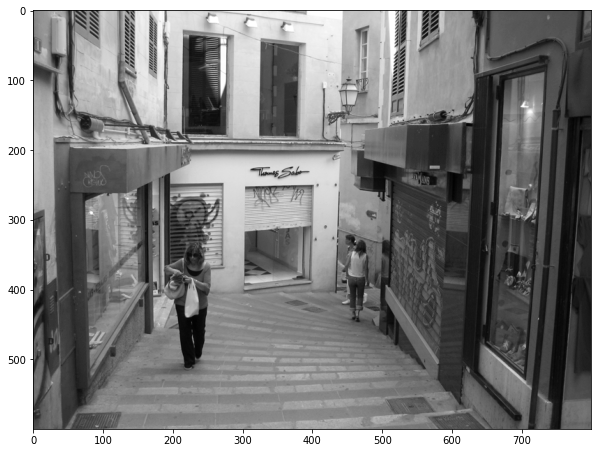

In [2]:
file_dir = 'images/'
file_name = 'palma'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/palma.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

We will look at the following noise types :

- Gaussian noise
- Impulse (salt-and-pepper, 0 or 1) noise
- Missing pixels

Fill in the following functions to add this noise to a gray-level image. Do not forget to clip the pixel values to the range $(0,1)$ (np.clip).

In [3]:
def add_gaussian_noise(img_in,sigma_noise = 0.01):
    noise = np.random.normal(0, sigma_noise, img_in.shape)
    img_out = img_in + noise
    img_out = img_out.clip(0,1)

    return img_out

# we define the impulse probability p as the probability of a pixel not being affected
def add_impulse_noise(img_in,p=0.9):
    len_x, len_y = img_in.shape
    noise_0 =  np.random.choice(a=[0, 1], size=img_in.shape, p=[(1-p)/2, p + (1-p)/2])
    noise_1 = np.random.choice(a=[1, 0], size=img_in.shape, p=[(1-p)/2, p + (1-p)/2])
    img_out = img_in * noise_0
    img_out = img_out + noise_1
    img_out = img_out.clip(0,1)
    return img_out

def add_missing_pixels_noise(img_in,p=0.9):
    noise = np.random.choice(a=[1, 0], size=img_in.shape, p=[p, 1-p])
    img_out = np.multiply(img_in, noise)
    return img_out

Add the different noises to the input image, and display (or write) the results. Use the following parameters :

- sigma_noise=0.05 for the gaussian noise
- $p=0.9$, the probability of a pixel __not__ being affected, for the impulse noise and missing pixels

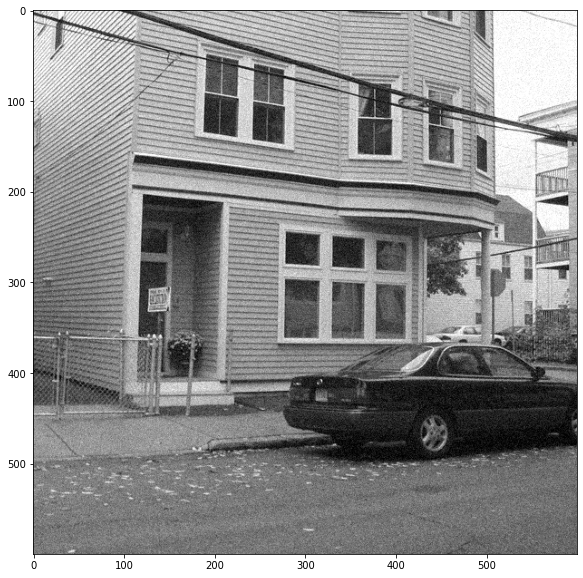

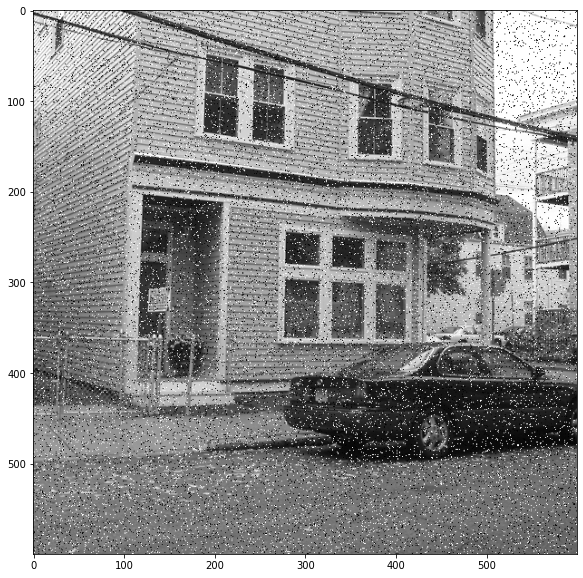

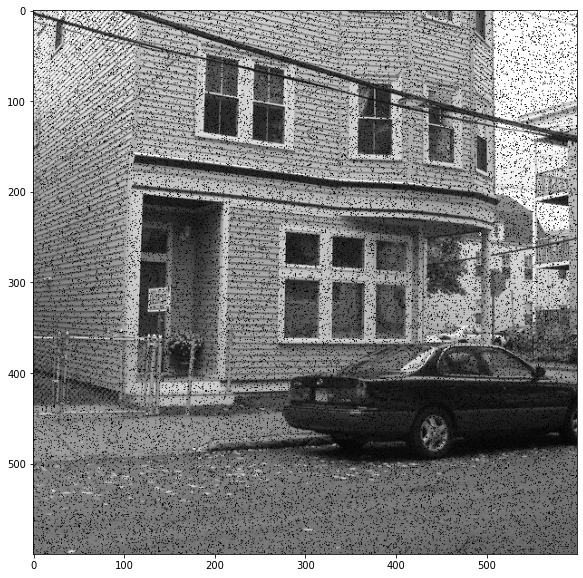

In [11]:
sigma_noise = 0.05
img_gray_gaussian = add_gaussian_noise(img_gray, sigma_noise)
display_image(img_gray_gaussian)

img_gray_impulse = add_impulse_noise(img_gray, 0.9)
display_image(img_gray_impulse)

img_gray_missing = add_missing_pixels_noise(img_gray, 0.9)
display_image(img_gray_missing)

__Question__ For each type of noise, propose a restoration filter (see course slides).

__Answer__ : For Gaussian noise : smoothing filter; for missing pixels and impulse : median filter. 

Implement these restoration filters in appropriately named functions, and write the corresponding output images. Try to find the parameters which give the best results (visually).

__IMPORTANT NOTE__, you can use the filtering functions of the ``scipy.ndimage`` package, where the filtering is already implemented (do not re-implement the filters)

In [5]:
from scipy import ndimage

# FILL IN CODE : CREATE THE FUNCTIONS TO CARRY OUT THE RESTORATION FILTERS AND WRITE THE RESULTS
def restore_imgs(img, param, filter):
    img_restored = filter(img, param)
    write_image(img_restored,file_name+'_restored.png')
    return img_restored

__Question__ Roughly speaking, what is the tradeoff which you are trying to achieve by tuning the parameters ?

__Answer__ : The trade off is restoring the faulty pixel while keeping the rest of the image as good as possible.

### Evaluation

A commonly used metric for denoising is the ''Peak Signal-to-Noise Ratio'' (PSNR). This is linked to the commonly known mean squared error. The mean squared error is defined, for a reference image $Y$ and a restored image $Y$, of size $m \times n$ as :

- MSE$(Y,I) = \frac{1}{mn} \sum_{x,y} \left( I_{x,y} - Y_{x,y}\right)^2 $

The PSNR is defined, in Decibels, as :

PSNR$(Y,I) = 10 * \log{\left( \frac{I_{max}^2}{MSE(Y,I)} \right)}$,

where $I_{max}$ is the maximum value of the image. For us (normalised to 1), this gives :

PSNR$(Y,I) = -10 * \log{ \left({MSE(Y,I)} \right)}$.

Implement this in a function, and create a code to plot the PSNR for several values of the paramter, __in the Gaussian case only (first filter)__. 

In [6]:
def PSNR(img,img_ref):
    mse = ((img - img_ref)**2).mean()
    psnr = -10 * np.log(mse)
    return psnr

# FILL IN CODE : TEST THE PSNR FOR SEVERAL VALUES OF SIGMA
for sigma in np.linspace(0.2, 3, 30):
    img_restored = restore_imgs(img_gray, sigma, ndimage.gaussian_filter)
    psnr = PSNR(img_gray, img_restored)
    print("Sigma : ", sigma, " PSNR : ", psnr )

Sigma :  0.2  PSNR :  293.26755934468514
Sigma :  0.29655172413793107  PSNR :  157.14242399709943
Sigma :  0.3931034482758621  PSNR :  109.81141763494067
Sigma :  0.48965517241379314  PSNR :  90.23040414020369
Sigma :  0.5862068965517242  PSNR :  81.12396461312642
Sigma :  0.6827586206896552  PSNR :  76.1132074463847
Sigma :  0.7793103448275862  PSNR :  72.84784738304428
Sigma :  0.8758620689655172  PSNR :  70.44871686779773
Sigma :  0.9724137931034482  PSNR :  68.55645298702699
Sigma :  1.0689655172413792  PSNR :  66.99999077343621
Sigma :  1.1655172413793102  PSNR :  65.68322230974933
Sigma :  1.2620689655172412  PSNR :  64.5473473111173
Sigma :  1.3586206896551725  PSNR :  63.55200813311389
Sigma :  1.4551724137931035  PSNR :  62.66742196293222
Sigma :  1.5517241379310345  PSNR :  61.874522776590275
Sigma :  1.6482758620689655  PSNR :  61.15635364430368
Sigma :  1.7448275862068965  PSNR :  60.50184707801938
Sigma :  1.8413793103448275  PSNR :  59.90128192032812
Sigma :  1.9379310344

## FUTHER RESTORATION TECHNIQUES (THIS IS NOT OBLIGATORY)

## Deconvolution

In this part of the TP, we are going to try and invert a convolution operation. This is called __deconvolution__, and can be carried out in the Fourier domain, as follows. For an image $I$, filter $f$ and an output $Y$, if we have :

$Y = I \ast f$,

then using the convolution theorem (see lesson), we have :

$I = \text{IFFT}\left(\frac{\hat{Y}}{\hat{f}}\right)$

where $\hat{Y}$ and $\hat{f}$ are the Fourier transforms of $Y$ and $f$ respectively.

To simplify the problem, we take a square image for this part of the TP.


(600, 600)

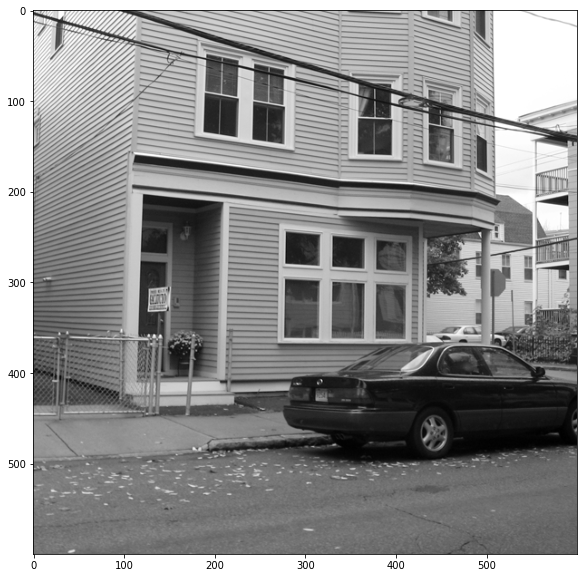

In [7]:
file_dir = 'images/'
file_name = 'boston'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boston.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)
img_gray.shape

display_image(img_gray)
img_gray.shape

Now, let us consider the following fiter, defined in the Fourier domain :

(600, 600)


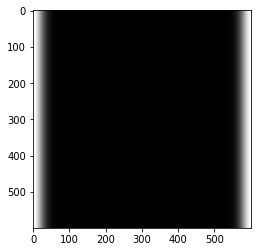

In [8]:
from scipy import signal

img_size = img_gray.shape[0]
h_size = int(np.floor(img_size/2.0))
f_hat = np.zeros((img_size,img_size))

X = np.asarray(range(-h_size,h_size))
f_hat = np.tile( np.expand_dims( np.exp(-( X**2) / (2.0*(20.0**2))) , axis=1), (1,img_size)).T
f_hat /= f_hat.sum()
f_hat = np.fft.ifftshift(f_hat)
plt.imshow( np.log( np.abs(f_hat)+1), cmap = 'gray')

print(f_hat.shape)

Using the convolution theorem and the inverse Fourier transform, carry out the convolution of the input image with $f$ (in the Fourier domain, so using $\hat{f}$) and write the result ``img_convolved`` to an output file

__Question__ What does this filter do (you can use the visualisation method from the first part of the TP to see what the filter spectrum looks like) ?
 How can this happen in real life ? 

In [9]:
img_convolved = np.real(np.fft.fftshift(np.fft.fft2(img_gray)) * f_hat)#np.real(np.fft.ifft2(np.fft.fftshift(np.fft.fft2(img_gray)) * f_hat))# FILL IN CODE

img_convolved -= img_convolved.min()
img_convolved /= img_convolved.max()

write_image(img_convolved,file_name+'_convolution.png')
img_convolved.max()

1.0

__Answer__ : It remove low frequency signal

Now, create a function which carries out a deconvolution in the Fourier domain, given an image and the Fourier transform of the filter $\hat{f}$. You can reuse the code in the first part of the TP. Carry out the deconvolution on ``img_convolved`` and write the result to an output file. Remember to renormalise the output image.

__Important note__ : You will have a problem with very small values of $\hat{f}$ (division by 0). Propose a simple method to address this issue.


In [10]:
def deconvolve_fourier(img,f_hat):
    spec = np.fft.fft2(img)
    spec_shifted = np.fft.fftshift(spec)
    spec_shifted_filtered = spec_shifted/f_hat
    spec_filtered = np.fft.ifftshift(spec_shifted_filtered)
    img_out = np.real(np.fft.ifft2(spec_filtered))
    return img_out
    

img_out = np.real(deconvolve_fourier(img_convolved,f_hat))
img_out -= img_out.min()
img_out /= img_out.max()


write_image(img_out,file_name+'_deconvolved.png')